In [9]:
import json
import glob
import os
from sacrebleu.metrics import BLEU, CHRF, TER
from nltk.tokenize import sent_tokenize
import nltk
import re
nltk.download('punkt')



file="/home/qiang/projects/Digital_mental_health/Dataset/Refined_dataset/2_llama/merge/SAS2UAS_merge.json"
with open(file, 'r', encoding='utf-8') as f:
    json_data = json.load(f)
    for item in json_data:
         
        post_sentences = [[item["Transferred_Post"]]]
        llama7b=[item["llama2:7B"]]
        llama13b=[item["llama2:13B"]]
        llama70b=[item["llama2:70B"]]
        gemma7b=[item["gemma:7B"]]
        mistral=[item["mistral"]]
        mixtral=[item["mixtral:8x7b"]]
        bleu = BLEU()
        item["BLEU_llama7b"]=float((re.search(r'(\d+\.\d+)', str(bleu.corpus_score(llama7b, post_sentences)).split("=", 1)[1].strip())).group(1))
        item["BLEU_llama13b"]=float((re.search(r'(\d+\.\d+)', str(bleu.corpus_score(llama13b, post_sentences)).split("=", 1)[1].strip())).group(1))
        item["BLEU_llama70b"]=float((re.search(r'(\d+\.\d+)', str(bleu.corpus_score(llama70b, post_sentences)).split("=", 1)[1].strip())).group(1))
        item["BLEU_gemma:7b"]=float((re.search(r'(\d+\.\d+)', str(bleu.corpus_score(gemma7b, post_sentences)).split("=", 1)[1].strip())).group(1))
        item["BLEU_mistral"]=float((re.search(r'(\d+\.\d+)', str(bleu.corpus_score(mistral, post_sentences)).split("=", 1)[1].strip())).group(1))
        item["BLEU_mixtral"]=float((re.search(r'(\d+\.\d+)', str(bleu.corpus_score(mixtral, post_sentences)).split("=", 1)[1].strip())).group(1))
        
        # print(item["BLEU_llama7b"])
#     # # 写回修改后的数据到新文件夹中
#     # # 获取原始文件名
    base_name = os.path.basename(file)
    new_file_name = f"BLEU4_{base_name}"
    with open(new_file_name, 'w', encoding='utf-8') as f:
        json.dump(json_data, f, ensure_ascii=False, indent=4)
    print(file)

# print("所有文件处理完毕。")

/home/qiang/projects/Digital_mental_health/Dataset/Refined_dataset/2_llama/merge/SAS2UAS_merge.json


[nltk_data] Downloading package punkt to /home/qiang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


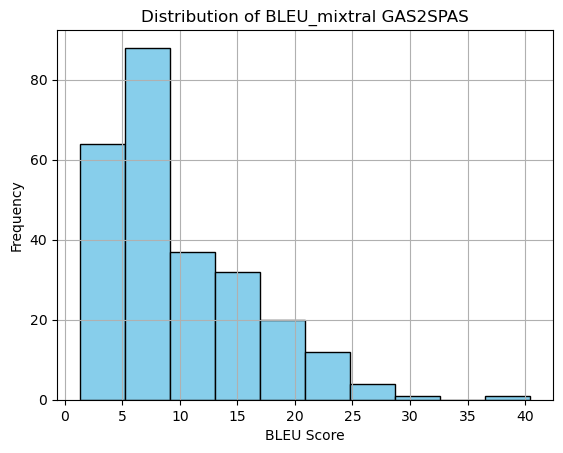

Average BLEU_mixtral_GAS2SPAS BLEU Score: 9.85872586872587


In [31]:
import json
import matplotlib.pyplot as plt

name='BLEU_mixtral'
at='GAS2SPAS'
# at='IAS2EAS'
# at='SAS2UAS'

def extract_bleu_scores(json_data):
    bleu_scores = [item[name] for item in json_data]
    return bleu_scores

def plot_histogram(bleu_scores):
    plt.hist(bleu_scores, bins=10, color='skyblue', edgecolor='black')
    plt.xlabel('BLEU Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+name+' '+at)
    plt.grid(True)
    plt.show()

def calculate_average(bleu_scores):
    return sum(bleu_scores) / len(bleu_scores)

def main():
    input_json="/home/qiang/projects/Digital_mental_health/Dataset/Refined_dataset/2_llama/BLEU/BLEU4_GAS2SPAS_merge.json"
    with open(input_json, 'r', encoding='utf-8') as file:
        json_data = json.load(file)

    bleu_scores = extract_bleu_scores(json_data)
    plot_histogram(bleu_scores)

    average_bleu_score = calculate_average(bleu_scores)
    print("Average " +name+"_" +at +" BLEU Score:", average_bleu_score)

if __name__ == '__main__':
    main()